In [1]:
#set up dependencies and read csv files
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import os

happiness_data = pd.read_csv('Resources/happiness/happiness_ranking2015.csv')
cellular_data = pd.read_csv('Resources/tech/cellular_subscription_data.csv')
internet_data = pd.read_csv('Resources/tech/internet_users_data.csv')
population_data = pd.read_csv('Resources/tech/population.csv')
cellular_data

,Country Name,Country Code,Total Cellular Subscriptions,Total Broadband Subscriptions
0,Aruba,ABW,1.410000e+05,19000.0
1,Afghanistan,AFG,1.970904e+07,7067.0
2,Angola,AGO,1.388453e+07,153571.0
3,Albania,ALB,3.400955e+06,242870.0
4,Andorra,AND,7.133600e+04,30694.0
5,Arab World,ARB,4.171956e+08,16604050.0
6,United Arab Emirates,ARE,1.794256e+07,1234447.0
7,Argentina,ARG,6.184201e+07,6855837.0
8,Armenia,ARM,3.464490e+06,286319.0
9,American Samoa,ASM,NaN,NaN


In [2]:
#clean, merge, and organize tech data
tech_data = pd.merge(cellular_data, internet_data, on='Country Code', how='outer')
del tech_data['Country Name_y']
cleaned_tech_data = tech_data.rename(columns={'Country Name_x': 'Country'})
cleaned_tech_data['Total Cellular Subscriptions'].replace('', np.nan, inplace=True)
cleaned_tech_data['Total Broadband Subscriptions'].replace('', np.nan, inplace=True)
cleaned_tech_data['% of Internet Users'].replace('', np.nan, inplace=True)
cleaned_tech_data.dropna(subset=['Total Cellular Subscriptions'], inplace=True)
cleaned_tech_data.dropna(subset=['Total Broadband Subscriptions'], inplace=True)
cleaned_tech_data.dropna(subset=['% of Internet Users'], inplace=True)
cleaned_tech_data['Total Cellular Subscriptions'] = cleaned_tech_data['Total Cellular Subscriptions'].astype(int)
cleaned_tech_data['Total Broadband Subscriptions'] = cleaned_tech_data['Total Broadband Subscriptions'].astype(int)
cleaned_tech_data.head()

,Country,Country Code,Total Cellular Subscriptions,Total Broadband Subscriptions,% of Internet Users
0,Aruba,ABW,141000,19000,88.66
1,Afghanistan,AFG,19709038,7067,8.26
2,Angola,AGO,13884532,153571,12.40
3,Albania,ALB,3400955,242870,63.25
4,Andorra,AND,71336,30694,96.91


In [15]:
#added population data
completed_data = pd.merge(cleaned_tech_data, population_data, on='Country Code', how='left')
del completed_data['Country Name']
completed_data['Total Population'].replace('', np.nan, inplace=True)
completed_data.dropna(subset=['Total Population'], inplace=True)
completed_data['Total Cellular Subscriptions'] = pd.to_numeric(completed_data['Total Cellular Subscriptions'], errors='coerce')
completed_data['Total Broadband Subscriptions'] = pd.to_numeric(completed_data['Total Broadband Subscriptions'], errors='coerce')
completed_data['Total Population'] = pd.to_numeric(completed_data['Total Population'], errors='coerce')
completed_data['Cellular Subscriptions per Citizen'] = completed_data['Total Cellular Subscriptions'].div(completed_data['Total Population'])
completed_data['Broadband Subscriptions per Citizen'] = completed_data['Total Broadband Subscriptions'].div(completed_data['Total Population'])
completed_data.head()

,Country,Country Code,Total Cellular Subscriptions,Total Broadband Subscriptions,% of Internet Users,Total Population,Cellular Subscriptions per Citizen,Broadband Subscriptions per Citizen
0,Aruba,ABW,141000,19000,88.66,104341.0,1.351338,0.182095
1,Afghanistan,AFG,19709038,7067,8.26,33736494.0,0.584205,0.000209
2,Angola,AGO,13884532,153571,12.40,27859305.0,0.498380,0.005512
3,Albania,ALB,3400955,242870,63.25,2880703.0,1.180599,0.084309
4,Andorra,AND,71336,30694,96.91,78014.0,0.914400,0.393442


In [16]:
#merge tech data with happiness data
combined_data = pd.merge(happiness_data, completed_data, on='Country Code', how='left')
del combined_data['Unnamed: 0']
del combined_data['Country_y']
del combined_data['Short Name']
del combined_data['Lat']
del combined_data['Lng']
del combined_data['Health (Life Expectancy)']
tech_vs_happiness_data = combined_data.rename(columns={'Country_x': 'Country'})
tech_vs_happiness_data.dropna(subset=['Total Cellular Subscriptions'], inplace=True)
tech_vs_happiness_data.dropna(subset=['% of Internet Users'], inplace=True)
tech_vs_happiness_data['Total Cellular Subscriptions'] = tech_vs_happiness_data['Total Cellular Subscriptions'].astype(int)
tech_vs_happiness_data['Total Broadband Subscriptions'] = tech_vs_happiness_data['Total Broadband Subscriptions'].astype(int)
tech_vs_happiness_data['Total Population'] = tech_vs_happiness_data['Total Population'].astype(int)
export_csv = tech_vs_happiness_data.to_csv (r'Resources/tech_dataframe.csv', index = None, header=True)
tech_vs_happiness_data

,Country,Happiness Score,Happiness Rank,Country Code,Total Cellular Subscriptions,Total Broadband Subscriptions,% of Internet Users,Total Population,Cellular Subscriptions per Citizen,Broadband Subscriptions per Citizen
0,Switzerland,7.587,1,CHE,11243210,3700563,87.48,8282396,1.357483,0.446799
1,Iceland,7.561,2,ISL,383919,124436,98.20,330815,1.160525,0.376150
2,Denmark,7.527,3,DNK,7079249,2404962,96.33,5683483,1.245583,0.423149
3,Norway,7.522,4,NOR,5714890,2047146,96.81,5190239,1.101084,0.394422
4,Canada,7.427,5,CAN,29765000,13030000,88.47,35832513,0.830670,0.363636
5,Finland,7.406,6,FIN,7396200,1729897,86.42,5479531,1.349787,0.315702
6,Netherlands,7.378,7,NLD,20809054,7029097,91.72,16939923,1.228403,0.414943
7,Sweden,7.364,8,SWE,12638827,3496240,90.61,9799186,1.289783,0.356789
8,New Zealand,7.286,9,NZL,5600000,1450900,88.22,4595700,1.218530,0.315708
9,Australia,7.284,10,AUS,25770000,6828000,84.56,23850784,1.080468,0.286280


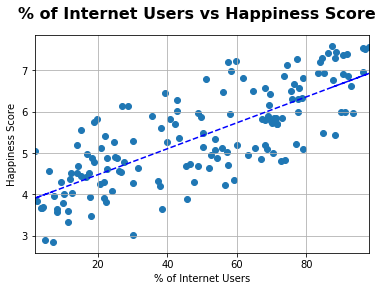

In [12]:
int_users = tech_vs_happiness_data['% of Internet Users']
hap_score = tech_vs_happiness_data['Happiness Score']
x_axis = int_users
y_axis = hap_score
(slope_int, intercept_int, r_int, p_int , se_int) = linregress(x_axis,y_axis)
fit = slope_int * x_axis + intercept_int

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("% of Internet Users vs Happiness Score", fontsize=16, fontweight="bold")

ax1.set_xlim(min(int_users), max(int_users))

ax1.scatter(int_users, hap_score , marker="o")
ax1.plot(x_axis, fit, 'b--', label='y={:.2f}x+{:.2f}'.format(slope_int,intercept_int))

ax1.set_ylabel("Happiness Score")
ax1.set_xlabel("% of Internet Users")
plt.savefig('Resources/int_users.png')
plt.grid()

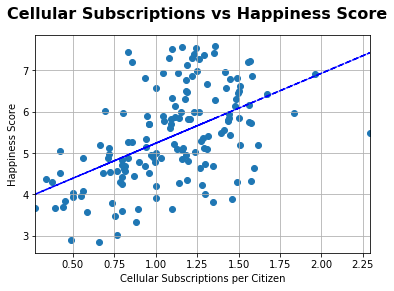

In [13]:
total_cell = tech_vs_happiness_data['Cellular Subscriptions per Citizen']
x_axis = total_cell
y_axis = hap_score
(slope_int, intercept_int, r_cell, p_cell, se_cell) = linregress(x_axis,y_axis)
fit = slope_int * x_axis + intercept_int

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Cellular Subscriptions vs Happiness Score", fontsize=16, fontweight="bold")

ax1.set_xlim(min(total_cell), max(total_cell))

ax1.scatter(total_cell, hap_score , marker="o")
ax1.plot(x_axis, fit, 'b--', label='y={:.2f}x+{:.2f}'.format(slope_int,intercept_int))

ax1.set_ylabel("Happiness Score")
ax1.set_xlabel("Cellular Subscriptions per Citizen")
plt.savefig('Resources/cell_sub.png')
plt.grid()

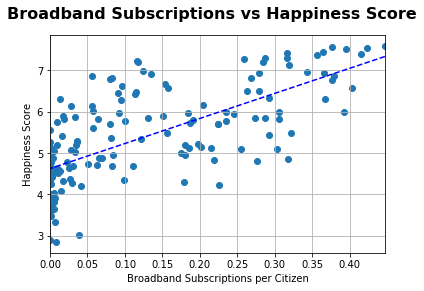

In [14]:
total_broad = tech_vs_happiness_data['Broadband Subscriptions per Citizen']
x_axis = total_broad
y_axis = hap_score
(slope_int, intercept_int, r_broad, p_broad, se_broad) = linregress(x_axis,y_axis)
fit = slope_int * x_axis + intercept_int

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Broadband Subscriptions vs Happiness Score", fontsize=16, fontweight="bold")

ax1.set_xlim(min(total_broad), max(total_broad))

ax1.scatter(total_broad, hap_score , marker="o")
ax1.plot(x_axis, fit, 'b--', label='y={:.2f}x+{:.2f}'.format(slope_int,intercept_int))

ax1.set_ylabel("Happiness Score")
ax1.set_xlabel("Broadband Subscriptions per Citizen")
plt.savefig('Resources/broad_sub.png')
plt.grid()

In [8]:
stats_df = pd.DataFrame({"Factors": ['Internet Users (% of Population)',
                                     'Cellular Subscriptions per Citizen', 
                                     'Broadband Subscriptions per Citizen'],
                        "R Value": [r_int, r_cell, r_broad],
                        "P Value": [p_int, p_cell, p_broad],
                        "Standard Error": [se_int, se_cell, se_broad]})
stats_df

,Factors,R Value,P Value,Standard Error
0,Internet Users (% of Population),0.766207,1.310218e-30,0.002145
1,Cellular Subscriptions per Citizen,0.513413,1.345599e-11,0.230826
2,Broadband Subscriptions per Citizen,0.686543,1.627348e-22,0.523906
